In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Marketing_Data.csv')
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
df.duplicated().sum()

0

In [ ]:
x = df[['youtube', 'facebook', 'newspaper']].values
y = df['sales'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression(normalize=False)
regressor.fit(X_train, y_train)
ypred = regressor.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


In [ ]:
pd.DataFrame({'actual': y_test,
       'prediction':ypred})

,actual,prediction
0,8.40,9.595297
1,24.12,23.124793
2,17.76,19.645030
3,30.48,29.014537
4,13.56,12.273314
5,12.96,14.852269
6,24.96,25.175728
7,15.48,16.754144
8,29.64,26.483310
9,11.40,13.639867


In [ ]:
pd.DataFrame({'actual': y_test,
       'prediction':ypred})

,actual,prediction
0,8.40,9.595297
1,24.12,23.124793
2,17.76,19.645030
3,30.48,29.014537
4,13.56,12.273314
5,12.96,14.852269
6,24.96,25.175728
7,15.48,16.754144
8,29.64,26.483310
9,11.40,13.639867


In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,ypred)

2.980073487614754

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, ypred)*100

92.63035750949268

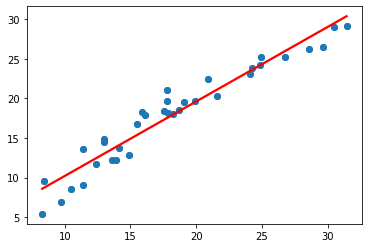

In [ ]:
plt.scatter(y_test,ypred)
sns.regplot(x=y_test, y=ypred,ci = None,line_kws={'color':'red'})

In [ ]:
m,n = x.shape

In [ ]:
def norm(X):
  mu = X.mean(0)
  sigma = X.std(0)
  xn = (X - mu) / sigma
  m,n = X.shape
  xn = np.hstack((np.ones((m, 1)), xn))
  return xn


In [ ]:
def computeCost(X, y, theta):
  m = len(y)
  diff = np.matmul(X, theta) - y
  J = 1 / (2 * m) * np.matmul(diff, diff) #diff squared
  return J

In [ ]:
def gradientDescent(X, y, theta, alpha, num_iters):

  m = len(y)
  J_history = []

  for i in range(num_iters):
    hc = np.dot(X, theta) - y
    theta -= alpha / m * np.dot(X.transpose(), hc)

    J_history.append(computeCost(X, y, theta))
    if i%1000 == 0:
      print('Iter: ',i,'Cost = ',computeCost(X, y, theta))

    plt.plot(J_history)
  return theta

Iter:  0 Cost =  154.09930707601595
Iter:  1000 Cost =  2.099636517965226
Iter:  2000 Cost =  2.0996320624096585
Iter:  3000 Cost =  2.0996320624022515
Iter:  4000 Cost =  2.0996320624022524
Iter:  5000 Cost =  2.099632062402251
Iter:  6000 Cost =  2.0996320624022515
Iter:  7000 Cost =  2.0996320624022515
Iter:  8000 Cost =  2.0996320624022515
Iter:  9000 Cost =  2.0996320624022515


array([16.59970588,  4.626252  ,  3.30710754,  0.10909634])

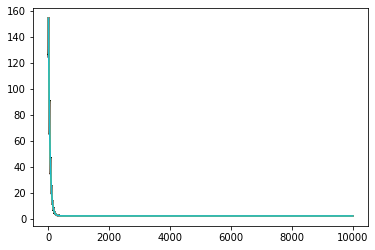

In [ ]:
iters = 10000
lrate = 0.01
theta = np.zeros((n+1))
gradientDescent(norm(X_train), y_train, theta, lrate, iters)


In [ ]:
best_theta = [16.59970588,  4.626252  ,  3.30710754,  0.10909634]

In [ ]:
def pred(x):
  p = np.dot(x,best_theta)

  return p

In [ ]:
pred(norm(X_test))

array([ 8.38772297, 21.7287105 , 18.42887373, 27.51530536, 11.04843321,
       13.41219913, 23.82131905, 15.60102905, 24.90454546, 12.22774039,
       18.37569004, 21.12270142, 17.06276451, 11.62852263, 11.07015684,
       17.19049445, 22.49566016, 18.88405955, 16.76074779,  5.87295401,
       12.42160361, 22.73377789,  7.52134211, 19.9145688 , 23.7612044 ,
       18.27337052,  4.37193858, 24.72048669, 16.93097868, 13.08605823,
       16.90438905, 27.67262318, 10.59233637,  7.95217829, 16.59321915])

In [ ]:
pd.DataFrame({'Actual':y_test,
              'prediction':pred(norm(X_test))})

,Actual,prediction
0,8.40,8.387723
1,24.12,21.728710
2,17.76,18.428874
3,30.48,27.515305
4,13.56,11.048433
5,12.96,13.412199
6,24.96,23.821319
7,15.48,15.601029
8,29.64,24.904545
9,11.40,12.227740


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred(norm(X_test)))

5.429504966364244

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, pred(norm(X_test)))*100

86.57297859638851

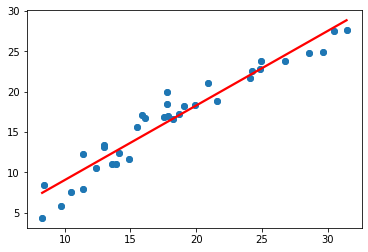

In [ ]:
plt.scatter(y_test,pred(norm(X_test)))
sns.regplot(x=y_test, y=pred(norm(X_test)),ci = None,line_kws={'color':'red'})